In [2]:
import pandas as pd
import numpy as np

In [3]:
I_data = pd.read_csv('iris.data',header=None)

In [4]:
I_data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
I_data.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
I_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
0    150 non-null float64
1    150 non-null float64
2    150 non-null float64
3    150 non-null float64
4    150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [7]:
I_data.columns = ['sepal length cm', 'sepal width cm', 'petal lenght cm', 'petal width cm', 'species']

In [8]:
I_data.head(10)

,sepal length cm,sepal width cm,petal lenght cm,petal width cm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()

In [11]:
I_data['species'] = le.fit_transform(I_data['species'])

In [12]:
I_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length cm    150 non-null float64
sepal width cm     150 non-null float64
petal lenght cm    150 non-null float64
petal width cm     150 non-null float64
species            150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = I_data.iloc[:,0:4]
Y = I_data.iloc[:,4]

In [15]:
X.head(10)

,sepal length cm,sepal width cm,petal lenght cm,petal width cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [16]:
Y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: species, dtype: int64

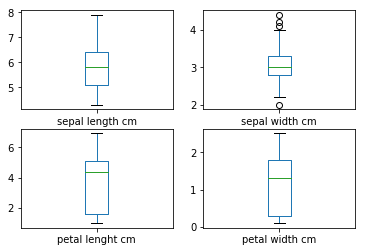

In [48]:
X.plot(kind='box', subplots=True, sharex=False, sharey=False, layout=(2,2))
plt.show()

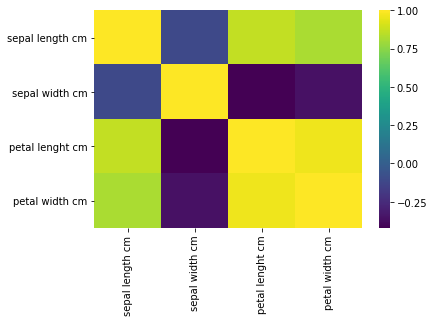

In [49]:
sns.heatmap(X.corr(),cmap='viridis')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=9)

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
clf = RandomForestClassifier(n_estimators=100,oob_score=True)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [20]:
y_pred = clf.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, roc_auc_score,classification_report,confusion_matrix

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy score of the RF model is: {}".format(accuracy))
print("Classification Report of the RF model is: \n",classification_report(y_test, y_pred))
print("Confusion Matrix of the RF model is: \n",confusion_matrix(y_test, y_pred))

Accuracy score of the RF model is: 0.9777777777777777
Classification Report of the RF model is: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        18
          1       0.93      1.00      0.97        14
          2       1.00      0.92      0.96        13

avg / total       0.98      0.98      0.98        45

Confusion Matrix of the RF model is: 
 [[18  0  0]
 [ 0 14  0]
 [ 0  1 12]]


In [23]:
clf.predict([4.5,3.5,1.5,0.5])

C:\Users\seque\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([0], dtype=int64)

In [32]:
feature_imp = pd.Series(clf.feature_importances_,I_data.columns[:4])

In [33]:
feature_imp

sepal length cm    0.091805
sepal width cm     0.031046
petal lenght cm    0.465794
petal width cm     0.411355
dtype: float64

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0,0.5,'Features')

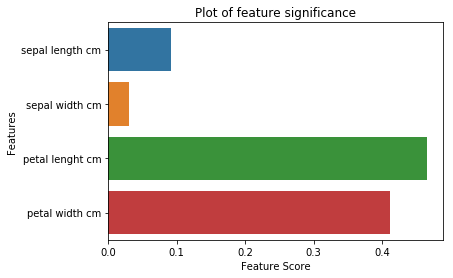

In [40]:
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.title('Plot of feature significance')
plt.xlabel('Feature Score')
plt.ylabel('Features')

In [25]:
from sklearn.externals import joblib

In [26]:
joblib.dump(clf,'irismodel.pkl')

['irismodel.pkl']